In [3]:
import pandas as pd

csv_path = "/Users/dhanalakshmijothi/Desktop/python/med_cnn_classifier/data/HAM10000_metadata.csv"

df = pd.read_csv(csv_path)
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [13]:
df.isnull().sum()


lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [14]:
df.duplicated().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

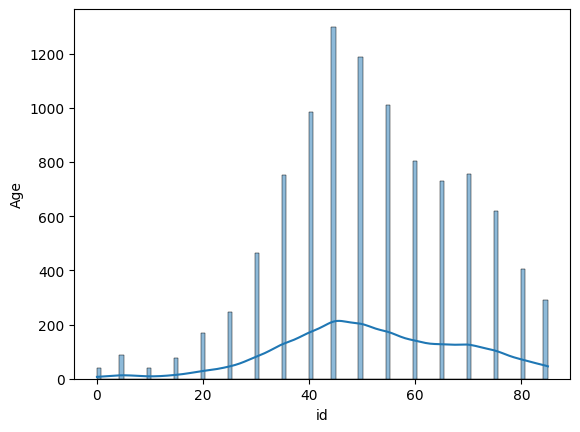

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Age_distribution = pd.DataFrame({
    'id': df['lesion_id'],
    'Age': df['age']
})

sns.histplot(Age_distribution, x='Age', bins=100, kde=True)
plt.xlabel('id')
plt.ylabel('Age')
plt.show

In [6]:
print("Number of images:", df.shape[0])
print("Unique labels:", df['dx'].unique())
print("Number of classes:", df['dx'].nunique())

Number of images: 10015
Unique labels: ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
Number of classes: 7


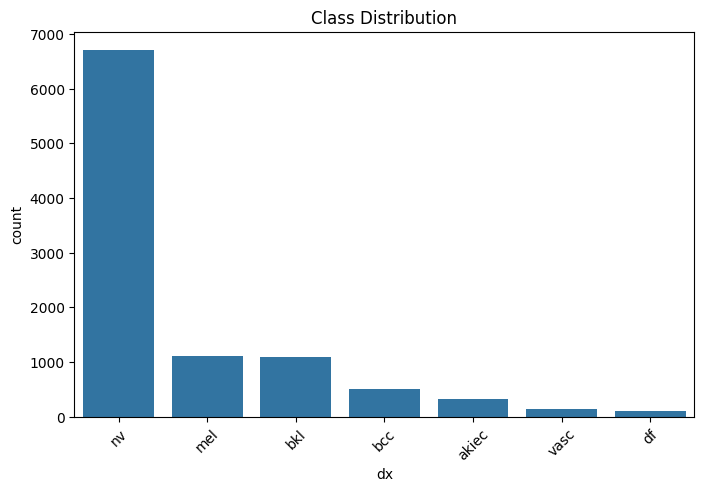

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='dx', order=df['dx'].value_counts().index)
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()

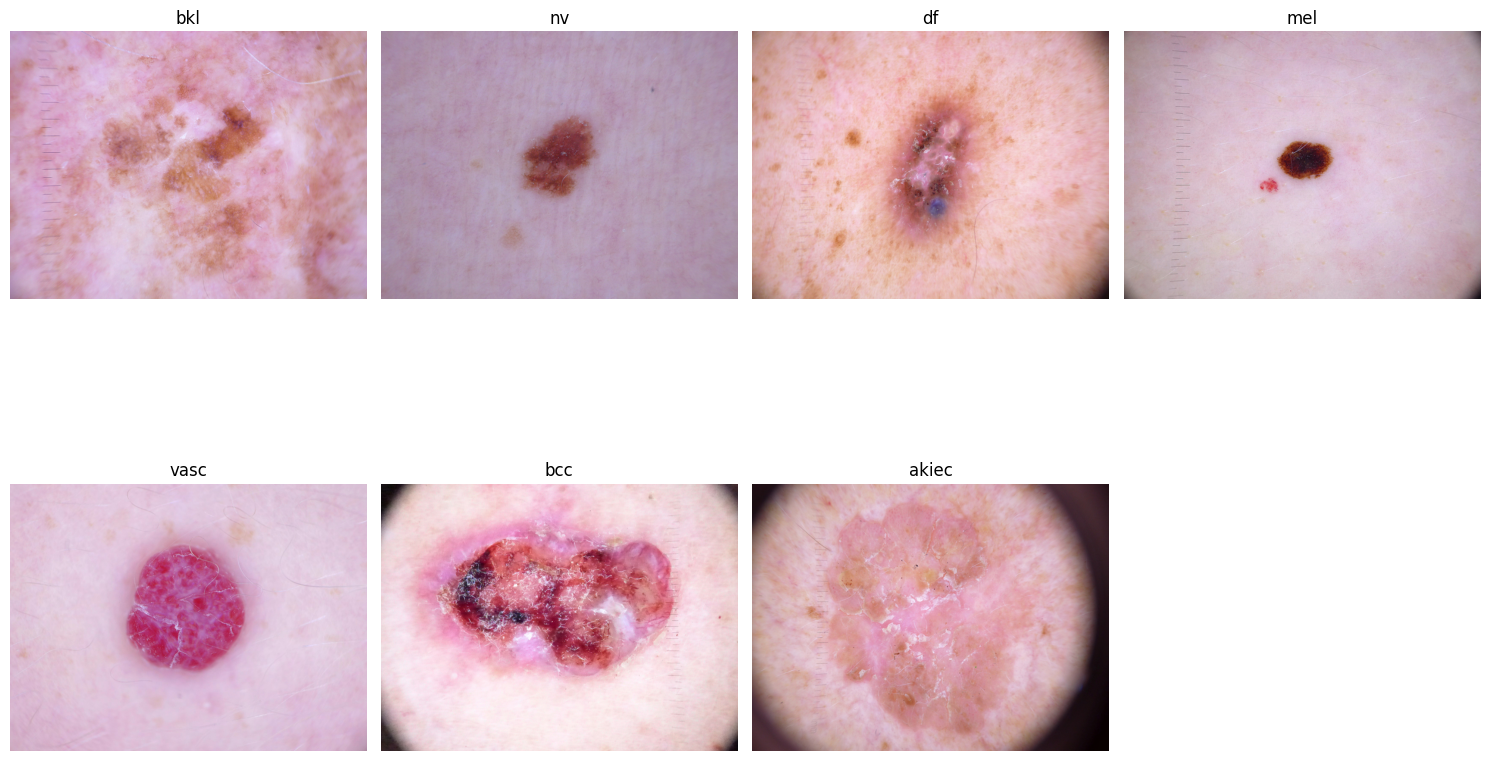

In [9]:
image_dir = "/Users/dhanalakshmijothi/Desktop/python/med_cnn_classifier/data/images"

classes = df['dx'].unique()
plt.figure(figsize=(15, 10))

for i, cls in enumerate(classes):
    image_path = df[df['dx'] == cls]['image_id'].values[0]
    img = Image.open(os.path.join(image_dir, image_path + ".jpg"))
    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
img_path = os.path.join(image_dir, df.iloc[0]['image_id'] + ".jpg")
img = Image.open(img_path)
print("Example image size:", img.size)  # (width, height)

Example image size: (600, 450)


- The dataset has class imbalance (e.g., 'nv' is overrepresented).
- All images appear to be RGB with consistent sizes.
- Will need to apply class balancing or augmentation in training.